In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from geopy.geocoders import Nominatim

# This is to supress the warning messages
import warnings
warnings.filterwarnings('ignore')

In [96]:
food_df = pd.read_csv(r'C:\Users\Owner\Downloads\onlinedeliverydata.csv')
print("Total Records: ",len(food_df))

Total Records:  388


In [97]:
food_df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [98]:
#Checking for duplicates
duplicate = food_df[food_df.duplicated()]
print("Total number of duplicated: ",len(duplicate))

Total number of duplicated:  102


In [99]:
food_df = food_df.drop_duplicates()
print("Total number of records after dropping duplicates: ",len(food_df))

Total number of records after dropping duplicates:  286


In [100]:
#Checking total null values
food_df.isnull().sum().sum()

0

In [101]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 0 to 369
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        286 non-null    int64  
 1   Gender                                     286 non-null    object 
 2   Marital Status                             286 non-null    object 
 3   Occupation                                 286 non-null    object 
 4   Monthly Income                             286 non-null    object 
 5   Educational Qualifications                 286 non-null    object 
 6   Family size                                286 non-null    int64  
 7   latitude                                   286 non-null    float64
 8   longitude                                  286 non-null    float64
 9   Pin code                                   286 non-null    int64  
 10  Medium (P1)               

In [102]:
#Understanding the columns
food_df.dtypes.value_counts()

object     50
int64       3
float64     2
dtype: int64

In [131]:
#Standardizing Column Names
food_df.columns = food_df.columns.str.replace(' ','_')
print(food_df.columns)

Index(['Age', 'Gender', 'Marital_Status', 'Occupation', 'Monthly_Income',
       'Educational_Qualifications', 'Family_size', 'latitude', 'longitude',
       'Pin_code', 'Medium_(P1)', 'Medium_(P2)', 'Meal(P1)', 'Meal(P2)',
       'Perference(P1)', 'Perference(P2)', 'Ease_and_convenient',
       'Time_saving', 'More_restaurant_choices', 'Easy_Payment_option',
       'More_Offers_and_Discount', 'Good_Food_quality', 'Good_Tracking_system',
       'Self_Cooking', 'Health_Concern', 'Late_Delivery', 'Poor_Hygiene',
       'Bad_past_experience', 'Unavailability', 'Unaffordable',
       'Long_delivery_time', 'Delay_of_delivery_person_getting_assigned',
       'Delay_of_delivery_person_picking_up_food', 'Wrong_order_delivered',
       'Missing_item', 'Order_placed_by_mistake', 'Influence_of_time',
       'Order_Time', 'Maximum_wait_time', 'Residence_in_busy_location',
       'Google_Maps_Accuracy', 'Good_Road_Condition', 'Low_quantity_low_time',
       'Delivery_person_ability', 'Influence_of_

In [192]:
food_df.corr()

,Age,Family_size,latitude,longitude,Pin_code,mapped_output
Age,1.000000,0.196929,0.065278,0.034115,0.064264,-0.226461
Family_size,0.196929,1.000000,-0.044014,0.055223,0.020884,-0.026369
latitude,0.065278,-0.044014,1.000000,-0.147579,-0.254707,-0.185842
longitude,0.034115,0.055223,-0.147579,1.000000,0.140533,0.042339
Pin_code,0.064264,0.020884,-0.254707,0.140533,1.000000,0.043881
mapped_output,-0.226461,-0.026369,-0.185842,0.042339,0.043881,1.000000


In [194]:
num_df = food_df.select_dtypes(exclude = 'object').copy()
num_df.head()

,Age,Family_size,latitude,longitude,Pin_code,mapped_output
0,20,4,12.9766,77.5993,560001,1
1,24,3,12.9770,77.5773,560009,1
2,22,3,12.9551,77.6593,560017,1
3,22,6,12.9473,77.5616,560019,1
4,22,4,12.9850,77.5533,560010,1


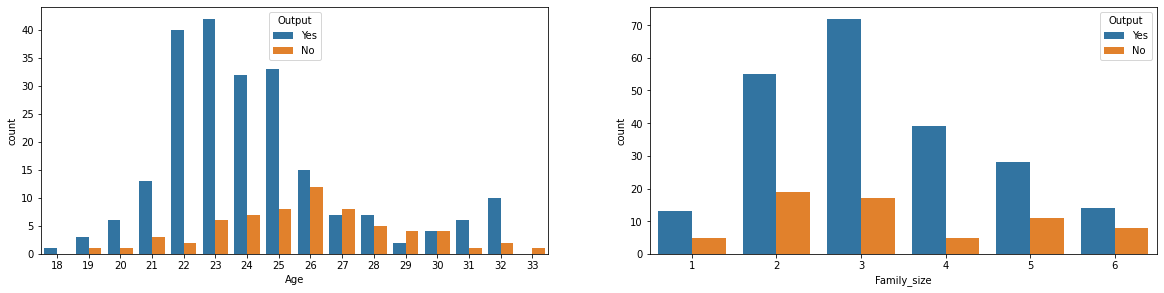

In [191]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(2,2,1) 
sns.countplot(data = food_df, x = 'Age', ax = ax1,hue='Output')


ax1 = fig.add_subplot(2,2,2) 
sns.countplot(data = food_df, x = 'Family_size', ax = ax1,hue='Output')
plt.show()

In [195]:
cat_df = food_df.select_dtypes(include = 'object').copy()
cat_df.head()

,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Medium_(P1),Medium_(P2),Meal(P1),Meal(P2),Perference(P1),...,Less_Delivery_time,High_Quality_of_package,Number_of_calls,Politeness,Freshness_,Temperature,Good_Taste_,Good_Quantity,Output,Reviews
0,Female,Single,Student,No Income,Post Graduate,Food delivery apps,Web browser,Breakfast,Lunch,Non Veg foods (Lunch / Dinner),...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,Female,Single,Student,Below Rs.10000,Graduate,Food delivery apps,Web browser,Snacks,Dinner,Non Veg foods (Lunch / Dinner),...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,Male,Single,Student,Below Rs.10000,Post Graduate,Food delivery apps,Direct call,Lunch,Snacks,Non Veg foods (Lunch / Dinner),...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,Female,Single,Student,No Income,Graduate,Food delivery apps,Walk-in,Snacks,Dinner,Veg foods (Breakfast / Lunch / Dinner),...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,Male,Single,Student,Below Rs.10000,Post Graduate,Walk-in,Direct call,Lunch,Dinner,Non Veg foods (Lunch / Dinner),...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


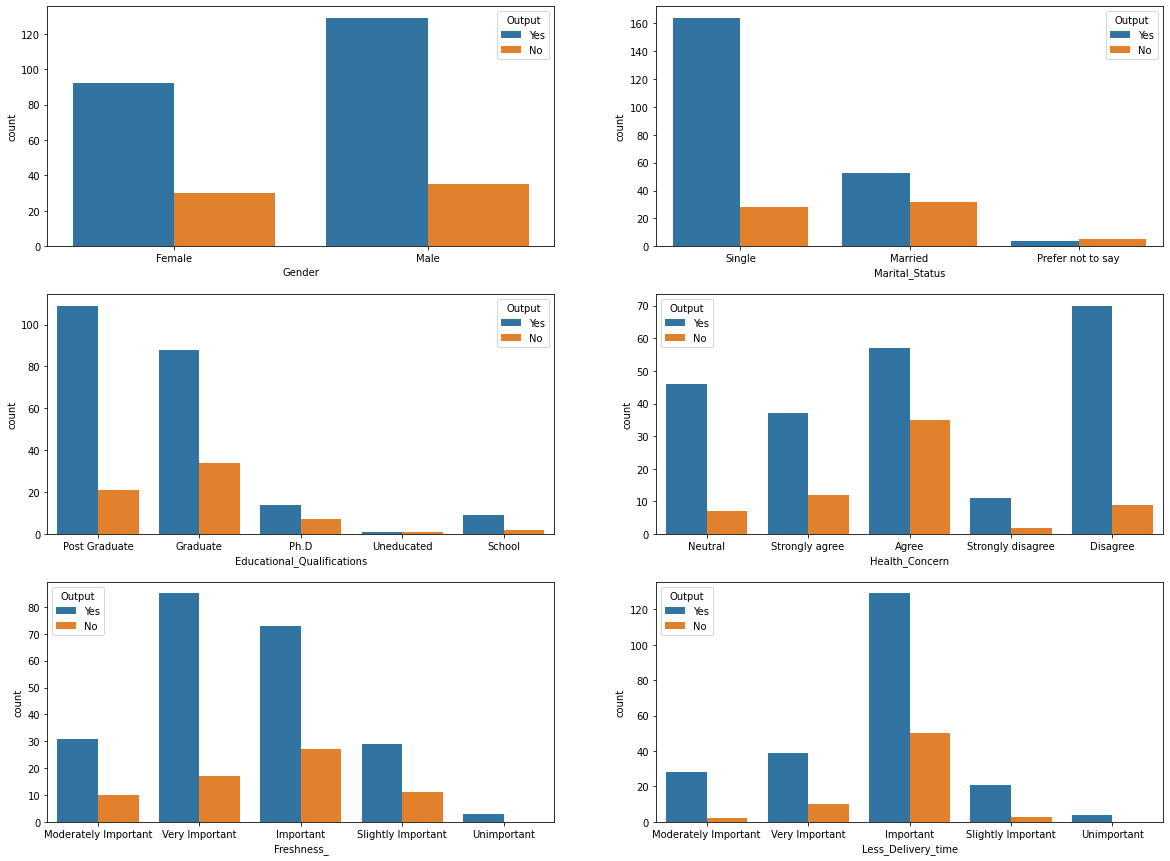

In [180]:
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(3,2,1) 
sns.countplot(data = food_df, x = 'Gender', ax = ax1,hue='Output')


ax1 = fig.add_subplot(3,2,2) 
sns.countplot(data = food_df, x = 'Marital_Status', ax = ax1,hue='Output')


ax1 = fig.add_subplot(3,2,3) 
sns.countplot(data = food_df, x = 'Educational_Qualifications', ax = ax1,hue='Output')

ax1 = fig.add_subplot(3,2,4) 
sns.countplot(data = food_df, x = 'Health_Concern', ax = ax1,hue='Output')

ax1 = fig.add_subplot(3,2,5) 
sns.countplot(data = food_df, x = 'Freshness_', ax = ax1,hue='Output')

ax1 = fig.add_subplot(3,2,6) 
sns.countplot(data = food_df, x = 'Less_Delivery_time', ax = ax1,hue='Output')
plt.show()

In [190]:
x = food_df.groupby(['latitude', 'longitude', 'Pin_code']).size().reset_index()
x.columns = ['latitude', 'longitude', 'pincode', 'frequency']
x.sort_values(by=['frequency'], ascending=False, inplace=True)

latitude = 12.972442
longitude = 77.580643
delivery_map = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lon, freq, pin in zip(x['latitude'], x['longitude'], x['frequency'], x['pincode']):
    folium.CircleMarker([lat, lon], radius=freq*1.5, 
                        popup = ('Pincode: <b>'+ str(pin)+'</b> <br>' 
                                 'No. of customers: <b>'+ str(freq)+'</b>'), 
                        tooltip='Click to expand',
                        color='b', 
                        fill_color='#FF5F15', 
                        fill=True, 
                        fill_opacity=0.8).add_to(delivery_map)
delivery_map

In [116]:
#Mapping 1 and 0 to Yes and No respectively for further analysis.
food_df['mapped_output'] = food_df['Output'].map({'Yes': 1, 'No': 0})
food_df.head()

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,latitude,longitude,Pin_code,...,High_Quality_of_package,Number_of_calls,Politeness,Freshness_,Temperature,Good_Taste_,Good_Quantity,Output,Reviews,mapped_output
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n,1
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil,1
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so...",1
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil,1
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL,1


In [117]:
#Calculating Weight of Evidence and Information Value for Feature Selection
def get_IV(df, feature, target):
    lst = []
    
    unique_values = df[feature].unique()
    for val in unique_values:
        lst.append([feature,                                                        # Feature name
                    val,                                                            # Value of a feature (unique)
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # Good (Fraud == 0)
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]   # Bad  (Fraud == 1)
                   ])
 
    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'Good', 'Bad'])

        
    total_bad = df[df[target] == 1].count()[feature]
    total_good = df.shape[0] - total_bad
    
    data['Distribution Good'] = data['Good']/ total_good
    data['Distribution Bad'] = data['Bad'] / total_bad
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])

    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    iv = data['IV'].sum()

    return iv, data

In [118]:
#Storing features and their IV values respectively
final_iv_values = {}
for i in food_df.columns:
    IV, Data = get_IV(food_df,i,'mapped_output')
    final_iv_values[i] = IV
    
#Sorting the the features in descending order of their IV values.
features = {}
for w in sorted(final_iv_values, key=final_iv_values.get, reverse=True):
    features[w] = final_iv_values[w]

    
#Selecting top 20 features for further analyses. 
newDict = dict()
i = 0 #Max Features
# Iterate over all the items in dictionary and filter items which has even keys
for (key, value) in features.items():
   # Check if key is even then add pair to new dictionary
    if value > 0.02 and value < 0.5 and i<=20:
            newDict[key] = value
            i= i + 1
newDict

{'Occupation': 0.46849201214472613,
 'Bad_past_experience': 0.447968022390487,
 'Marital_Status': 0.43602615701969183,
 'Health_Concern': 0.4310416211668638,
 'Unavailability': 0.4206323493525488,
 'Number_of_calls': 0.34612520714367473,
 'Monthly_Income': 0.31109959086914973,
 'Politeness': 0.2776151479355692,
 'Delay_of_delivery_person_picking_up_food': 0.24407301837422027,
 'Residence_in_busy_location': 0.23659187749732588,
 'Less_Delivery_time': 0.22535956621508033,
 'Poor_Hygiene': 0.19592179760175166,
 'Wrong_order_delivered': 0.19470275384471983,
 'Delay_of_delivery_person_getting_assigned': 0.17458595892752807,
 'Family_size': 0.1605994848656031,
 'Perference(P2)': 0.14689395017535709,
 'Educational_Qualifications': 0.1456552896680679,
 'High_Quality_of_package': 0.13395477591113297,
 'Good_Taste_': 0.0947255352598874,
 'Long_delivery_time': 0.09123685069896405,
 'Order_placed_by_mistake': 0.08351469693977742}

In [119]:
#Creating the list of names of top 20 features 
feature_list = []
for i in newDict:
    feature_list.append(i)
print(feature_list)

['Occupation', 'Bad_past_experience', 'Marital_Status', 'Health_Concern', 'Unavailability', 'Number_of_calls', 'Monthly_Income', 'Politeness', 'Delay_of_delivery_person_picking_up_food', 'Residence_in_busy_location', 'Less_Delivery_time', 'Poor_Hygiene', 'Wrong_order_delivered', 'Delay_of_delivery_person_getting_assigned', 'Family_size', 'Perference(P2)', 'Educational_Qualifications', 'High_Quality_of_package', 'Good_Taste_', 'Long_delivery_time', 'Order_placed_by_mistake']


In [204]:

#Adding Output Column in x and then removing for Train(X) and y='Output'
x = food_df.groupby(feature_list).size().reset_index()
X = data.drop('Output', axis=1) 

Index([                               'Occupation',
                             'Bad_past_experience',
                                  'Marital_Status',
                                  'Health_Concern',
                                  'Unavailability',
                                 'Number_of_calls',
                                  'Monthly_Income',
                                      'Politeness',
        'Delay_of_delivery_person_picking_up_food',
                      'Residence_in_busy_location',
                              'Less_Delivery_time',
                                    'Poor_Hygiene',
                           'Wrong_order_delivered',
       'Delay_of_delivery_person_getting_assigned',
                                     'Family_size',
                                  'Perference(P2)',
                      'Educational_Qualifications',
                         'High_Quality_of_package',
                                     'Good_Taste_',
            

In [199]:
y = f
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

NameError: name 'train_test_split' is not defined